# PMF, CMF, PDF and CDF

## Probability Mass Function, Probability Density Function and Cumulative Density Function

# Learning Goals:
    - Be able to explain and interpret the CMF, PMF, CDF and PDF
    - Be able to calculate the probability of certain events occurring given a distribution.

## Probability Mass Function

<img src="dice_pdf.svg.png" width=700>

## Probability Mass Function and Cumulative Mass Function
<img src="dice_cmg.jpg" width=850>

## PDF - Probability Density Function

Probability density functions serve to outline the underlying theoretical distribution of continuous variables. A PDF shows the relative likelihood of a given observation. For example, in our current example, you might wonder, what is the probability that an individual has a weight of 120 pounds? When working with PDFs, the answer to this would be 0. You really only can calculate probabilities within an interval for a continuous variable. While a lot of individuals may have a weight of approximately 120 pounds, the probability of having a weight of *exactly* 120 pounds is zero. You must define an interval, however small such as 119.999 to 120.001, in order to have a positive non-zero probability.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [31]:
!head babies.txt

bwt gestation parity age height weight smoke
120 284   0  27  62 100   0
113 282   0  33  64 135   0
128 279   0  28  64 115   1
123 999   0  36  69 190   0
108 282   0  23  67 125   1
136 286   0  25  62  93   0
138 244   0  33  62 178   0
132 245   0  23  65 140   0
120 289   0  25  62 125   0


In [32]:
df = pd.read_csv('baby_weights.csv')
df.head()

,weight
0,120
1,113
2,128
3,123
4,108


Text(0, 0.5, 'Relative Probability')

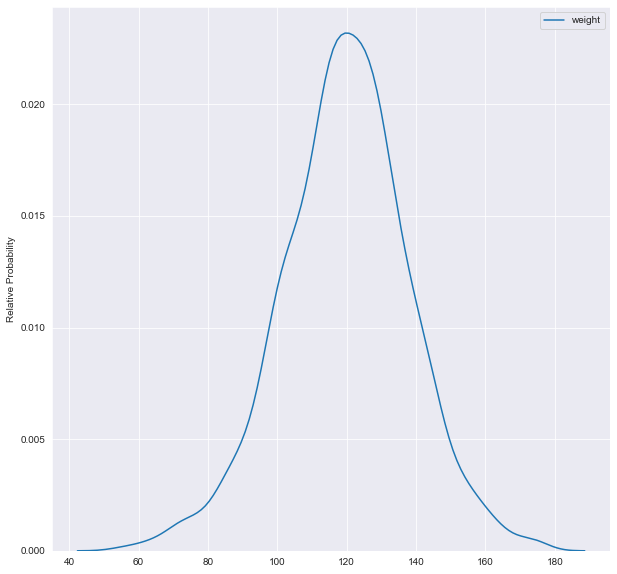

In [35]:
plt.figure(figsize=(10,10))
sns.kdeplot(df.weight);
plt.ylabel('Relative Probability')

## CDF - Cumulative Density Function

In [4]:
for i in range(10):
    print('{}th percentile: {}'.format(i*10, df.weight.quantile(q=i/10.0)))

0th percentile: 55.0
10th percentile: 97.0
20th percentile: 105.0
30th percentile: 111.0
40th percentile: 116.0
50th percentile: 120.0
60th percentile: 124.0
70th percentile: 129.0
80th percentile: 134.0
90th percentile: 142.0


/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0th percentile: 55.0
10th percentile: 97.0
20th percentile: 105.0
30th percentile: 111.0
40th percentile: 116.0
50th percentile: 120.0
60th percentile: 124.0
70th percentile: 129.0
80th percentile: 134.0
90th percentile: 142.0


Text(0,0.5,'Cumulative Density')

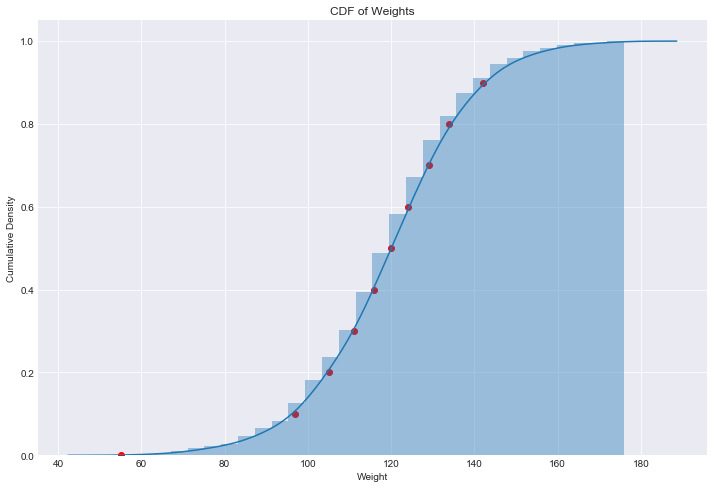

In [5]:
plt.figure(figsize=(12,8))
sns.distplot(df.weight,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True)
            )
for i in range(10):
    print('{}th percentile: {}'.format(i*10, df.weight.quantile(q=i/10.0)))
    plt.scatter(df.weight.quantile(q=i/10.0), i/10.0, c='red')
plt.title('CDF of Weights')
plt.xlabel('Weight')
plt.ylabel('Cumulative Density')

Q: Looking at the CDF, approximately what is the median of this dataset? The first quartile? The 75th percentile?

While PDFs are again, the underlying distribution behind a dataset, it can be helpful to see the comparison to histograms and the frequency of observations for a specific dataset to gain a deeper understanding:

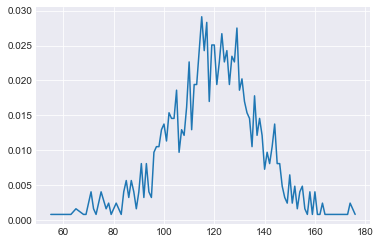

In [9]:
df.weight.value_counts(normalize=True).sort_index().plot()

## PMF -  Probability Mass Function

Probability Mass Functions, are similar to Probability Density Functions but deal with discrete data which can only take on a finite set of values. A classic example is the Poisson distribution, which is often useful for estimating the probability of X events in a given interval. Some applications could be the number of calls you receive in a day, the number of tires you pop in a year, or anything else with a [small] average discrete rate.

Let's assume that you get an average of 4.5 calls per day. According to the Poisson distribution, the Probability Mass Function for this is defined by $\frac{\lambda^k e^{-\lambda}}{k!}$, where lambda is the average rate and k is the observed occurences you wish to calculate the probability for. 

For example, given the current information, you might wonder what the probability of receiving exactly 6 calls in a day is.

You could calculate that by substituting 4.5 in for $\lambda$ and 6 in for k:

$\frac{4.5^6 e^{-4.5}}{6!}$

Write a for loop to calculate the probability of receiving X calls per day over the range of 1 to 10 inclusive. Plot these probabilities as a PMF.

What's the probability of receiving less then 5 calls per day? More then 10?

## Summary

In this lesson, we investigated the concepts and properties behind Probability Mass Functions, Probability Density Functions and Cumulative Density Functions. Recall that a Cumulative Density Function is analagous to percentiles. Probability Mass Functions and Probability Density Functions investigate the relative likelihood of various observations for discrete and continuous cases, respectively. Remember that when dealing with a continuous variable, the probability of taking on a specific measurement is zero. Rather, we must practically investigate intervals of values.

## Adendum
## Advanced PDF Exercises (with z-scores)

An appropriate PDF to characterize our dataset could be the normal distribution, using the mean and standard deviation given above.

According to the PDF defined by the summary statistics above, what is the probability that an individual has a weight between 115 and 125 pounds?

What is the observed probability of having a weight between 115 and 125 pounds according to the dataset?